---
title: Inline Interactivity in Jupyter using MyST
subtitle: Using inline widgets in JupyterLab markdown cells
author:
  - name: Rowan Cockett
    affiliations: Executable Books; Curvenote
    orcid: 0000-0002-7859-8394
    email: rowan@curvenote.com
  - name: Angus Hollands
    affiliations: Executable Books
  - name: Steve Purves
    affiliations: Executable Books; Curvenote
date: 2023/02/20
---

The [JupyterLab MyST extension](https://github.com/executablebooks/jupyterlab-myst) allows you to have MyST renderer in your markdown cells that includes interactivity and inline-evaluation.

This is done through the `` {eval}`1+1` `` role, which results in {eval}`1+1`. The extension can also access variables in the kernel.

:::{warning} Syntax is Subject to Change
:class: dropdown
The current syntax is based on a myst role, which may change in the future -- for example to be closer to an inline expression `${}`. This will go through a MyST enhancement proposal, and the `{eval}` role will likely still be supported.
:::

In [9]:
import numpy as np
array = np.arange(4)

Let's consider the following array: {eval}`array`.

We can compute the total: {eval}`array.sum()` and the maximum value is {eval}`array.max()`.

This is done through using MyST syntax: `` {eval}`array.sum()` `` and `` {eval}`array.max()` ``, respectively.

## Displaying text values computed by widgets

The example below builds a small widget that updates several values, and we then display them in markdown cells. We use a [`widgets.Label` object](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html?#Label), which stores a _string_ value and displays it as formatted html.

In [10]:
import ipywidgets as widgets

cookiesSlider = widgets.IntSlider(min=0, max=30, step=1, value=10, description="Cookies: ")
cookiesText = widgets.BoundedIntText(
    value=10,
    min=0,
    max=30,
    step=1,
)
widgetLink = widgets.jslink((cookiesSlider, 'value'), (cookiesText, 'value'))

caloriesPerCookie = 50
dailyCalories = 2100

calories = widgets.Label(value=f'{cookiesSlider.value * caloriesPerCookie}')
def fc(n):
    calories.value = f'{n["owner"].value * caloriesPerCookie}'
cookiesSlider.observe(fc)

def pct_cookie(cookies):
    return f"{cookies * caloriesPerCookie / dailyCalories * 100:.1f}"

percent = widgets.Label(value=pct_cookie(cookiesSlider.value))

def fp(change):
    percent.value = pct_cookie(change['new'])
    
cookiesSlider.observe(fp, 'value')

:::{important} Calculate Consuming Cookie Calories 🍪 🧮
When you eat {eval}`cookiesText` cookies, you consume {eval}`calories` calories. 

That's {eval}`percent`% of your recommended daily calories.

:::

You can also edit this through a slider if you want: {eval}`cookiesSlider`

:::{note} Improvements
:class: dropdown
There is a lot to improve both for formatting (e.g. format the numbering) and for the verbosity of the above code for linking and calculating the widgets.
These are probably going to be a combination of a MyST library for working with simple inline widgets and showing numbers, as well as improvements and tweaks to the inline renderers for the mime bundles.

But you can already do things! 🚀
:::

## Math rendering

You can create mathematical content with direct evaluation of expressions by combining Sympy's LaTeX output and Jupyter's built-in math rendering. Consider the following simple example:

In [11]:
import sympy as sy
x = sy.Symbol('x')
expr = x**2 + x + 1
I = sy.Integral(expr, (x, 0, 1))

The integral {eval}`I` can be analytically computed:

{eval}`I` = {eval}`I.doit()`.

:::{warning} Math rendering is still unstable

We've noticed issues with this feature - rendering is slow and sometimes weird glitches occur. [We're tracking it](https://github.com/executablebooks/jupyterlab-myst/issues/96).
:::

## Markdown, videos, images and more

Note that you can use the `Markdown` object built into `IPython.display` to programatically compute Markdown results that will work as if you had typed them. Here's a simple example of constructing a predictable link, that of a YouTube video, based on its video ID:

In [12]:
from IPython.display import Markdown, YouTubeVideo

def ytlink(vid):
    return Markdown(f"[YouTube Video](https://www.youtube.com/watch?v={vid})")

This {eval}`ytlink('NxSNVt9XsCI')` is a tutorial on how to use MyST for writing scientific documents.

:::{warning} Inline videos don't work yet

Note that the following code should produce a working video, as you can see in the next cell. This is not currently working, but [we're tracking it](https://github.com/executablebooks/jupyterlab-myst/issues/97).

```
{eval}`YouTubeVideo('NxSNVt9XsCI')`
```
:::

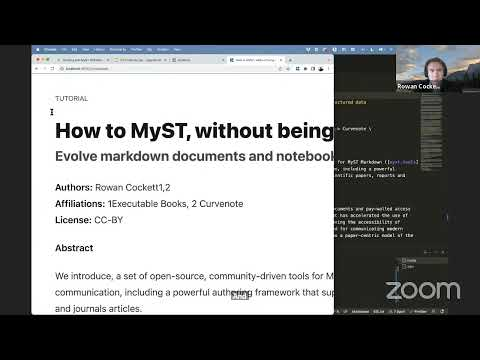

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('NxSNVt9XsCI')

In [14]:
from IPython.display import Image, HTML

i = Image(url='https://source.unsplash.com/random/400x50?sunset')

This should be an inline image of a sunset: {eval}`i`

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def spark(data):
    """A very simple sparkline.
    """
    fig, ax = plt.subplots(figsize=(10,2))
    ax.plot(data, 'b-')
    ax.axhline(c='grey', alpha=0.5);
    ax.axis('off')
    fig.tight_layout()
    plt.close(fig)
    return fig, ax

# Step 1: Predict the stock market, with surprising accuracy:
data = np.cumsum(np.random.rand(1000)-0.5)
data -= np.mean(data)

stocks, ax1 = spark(data)
annotated, ax2 = spark(data)
ax2.axvspan(450, 560, color='red', alpha=0.5)
ax2.axvspan(680, 740, color='green', alpha=0.5);


If we look at the following stock price for [Apple](https://en.wikipedia.org/wiki/Apple_Inc.) ({eval}`stocks`) we can see that in 2003, they started selling [computers](https://en.wikipedia.org/wiki/MacBook_Pro), in the red region and their stock went crazy once the investment paid off ({eval}`annotated`).[^note]

[^note]: Both the graphs are fake, but pretty cool right!  

In [16]:
text_hover = HTML('<span onmouseover="this.innerText=\'💚\'" onmouseout="this.innerText=\'🎉\'">❤️</span>');

Try hovering over this element[^trust]: {eval}`text_hover`

[^trust]: You may need to set your notebook to trusted to do this (open the Command Palette from the `View` menu and type "trust")!